In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
A = 2050
dA = 60

In [3]:
pressures = np.array([41, 80, 120, 160, 200])
data_raw = [pd.read_csv(f'{i}.csv') for i in pressures]
data = []
for i in range(5):
    data.append(data_raw[i].loc[10:])
    data[i]['t (s)'] -= data[i].loc[10,'t (s)']

/tmp/ipykernel_105402/1230113664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]['t (s)'] -= data[i].loc[10,'t (s)']


In [4]:
def df_to_xy(df):
    # returns X, Y, where X = df['time'], Y = log(df['V'])
    X = df['t (s)'].to_numpy()
    Y = np.log(df['V (mV)'].to_numpy())
    
    return X, Y

def df_to_xy_sparse(df):
    # returns X, Y, where X = df['time'], Y = log(df['V'])
    X = df['t (s)'].to_numpy()[::10]
    Y = np.log(df['V (mV)'].to_numpy())[::10]
    
    return X, Y

def df_to_xy_raw(df):
    # returns X, Y, where X = df['time'], Y = df['V']
    X = df['t (s)'].to_numpy()
    Y = df['V (mV)'].to_numpy()
    
    return X, Y

In [5]:
def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)
    
    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    return a, b, da, db

def plot(X, Y, dX=0, dY=0, do_mnk=False,
         color='royalblue', linecolor='orange', linewidth=2, marker='o', legend_text=None, x_mm=None):
        
    legend = "" if legend_text is None else legend_text
    plt.scatter(X, Y, color=color, marker=marker, label=legend)
    
    if (dX != 0) or (dY != 0):
        plt.errorbar(X, Y, xerr=dX, yerr=dY, linestyle='', color=color)
    
    
    if do_mnk:
        a, b, da, db = mnk(X,Y)
        if x_mm is None:
            x_min = np.min(X)
            x_max = np.max(X)
            x_mm = np.array([x_min, x_max])

        plt.plot(x_mm, a*x_mm + b, color=linecolor, linewidth=linewidth)
        print(f'a: {a} \t da: {da} \nb: {b} \t db: {db}\n--------------------------------')


In [6]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['o', 's', '^', 'D', '>']

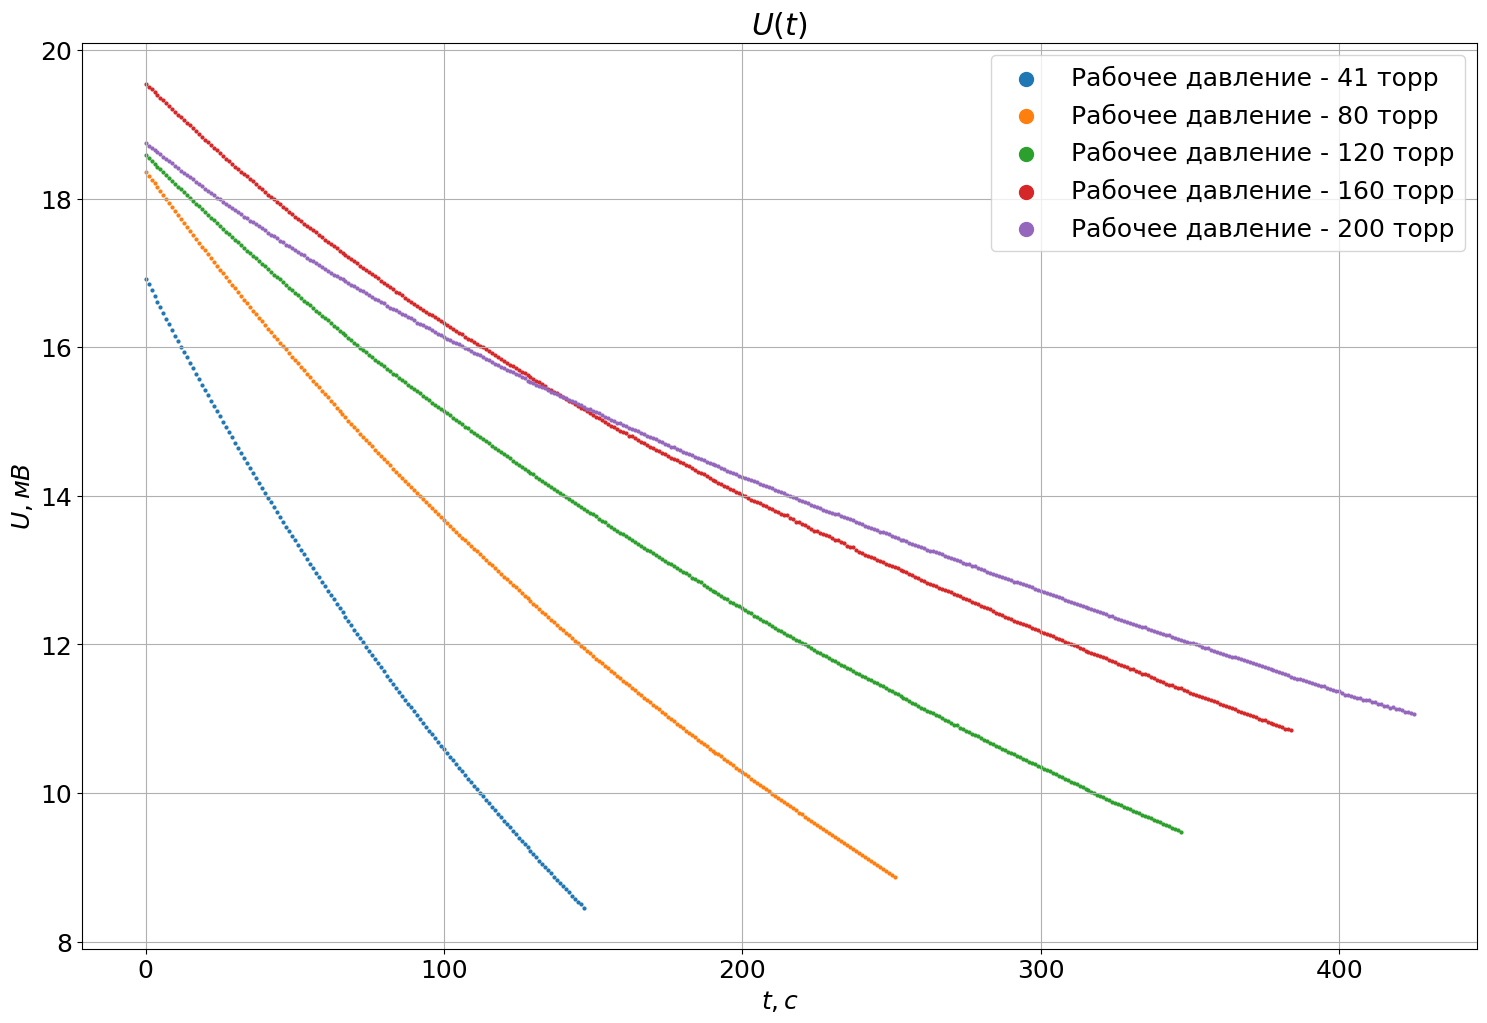

In [8]:
plt.figure(figsize=(18, 12), dpi=100)
plt.rcParams['font.size'] = 18
plt.grid(True)
plt.title("$U(t)$")
plt.xlabel(r"$t, с$")
plt.ylabel(r"$U,мВ$")
for i, el in enumerate(data):
    plt.scatter(*df_to_xy_raw(el), marker='o', label=f"Рабочее давление - {pressures[i]} торр",
                linewidth=1, s=4)

lgnd = plt.legend()
for i in range(5):
    lgnd.legendHandles[i]._sizes = [100]
plt.savefig("../pictures/U(t).png")

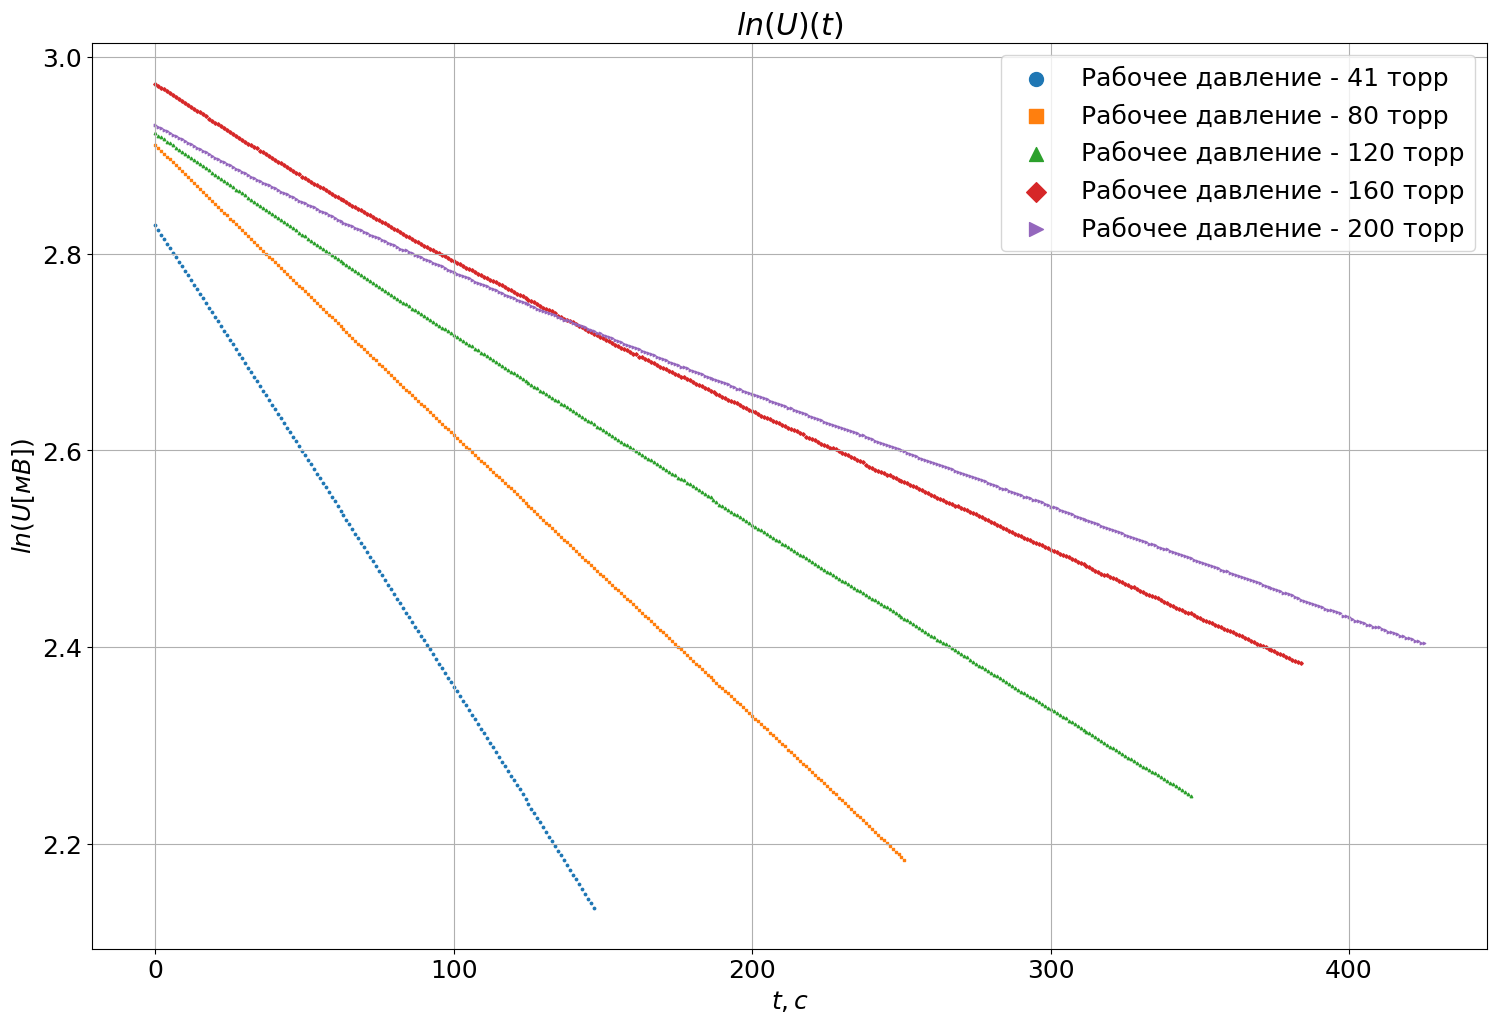

In [9]:
plt.figure(figsize=(18, 12), dpi=100)
plt.rcParams['font.size'] = 18
plt.grid(True)
plt.title("$ln(U)(t)$")
plt.xlabel(r"$t, с$")
plt.ylabel(r"$ln(U[мВ])$")
for i, el in enumerate(data):
    plt.scatter(*df_to_xy(el), marker=markers[i], label=f"Рабочее давление - {pressures[i]} торр", linewidth=1, s=3)

lgnd = plt.legend()
for i in range(5):
    lgnd.legendHandles[i]._sizes = [100]
plt.savefig("../pictures/lnU(t).png")

a: -0.004715657459732395 	 da: 3.3021683816156747e-06 
b: 212.05950782878708 	 db: 0.1484959855020811
--------------------------------
a: -0.0028853870662871846 	 da: 2.9408466267105863e-06 
b: 346.57395248075505 	 db: 0.3532353946433542
--------------------------------
a: -0.0019278216775497265 	 da: 3.479793977648979e-06 
b: 518.7201760647314 	 db: 0.9363103267151176
--------------------------------
a: -0.0015029981587757514 	 da: 7.313857391056697e-06 
b: 665.3368097367049 	 db: 3.2376477076981707
--------------------------------
a: -0.0012096518249767939 	 da: 5.855475446081418e-06 
b: 826.6841576659334 	 db: 4.0016711312531905
--------------------------------


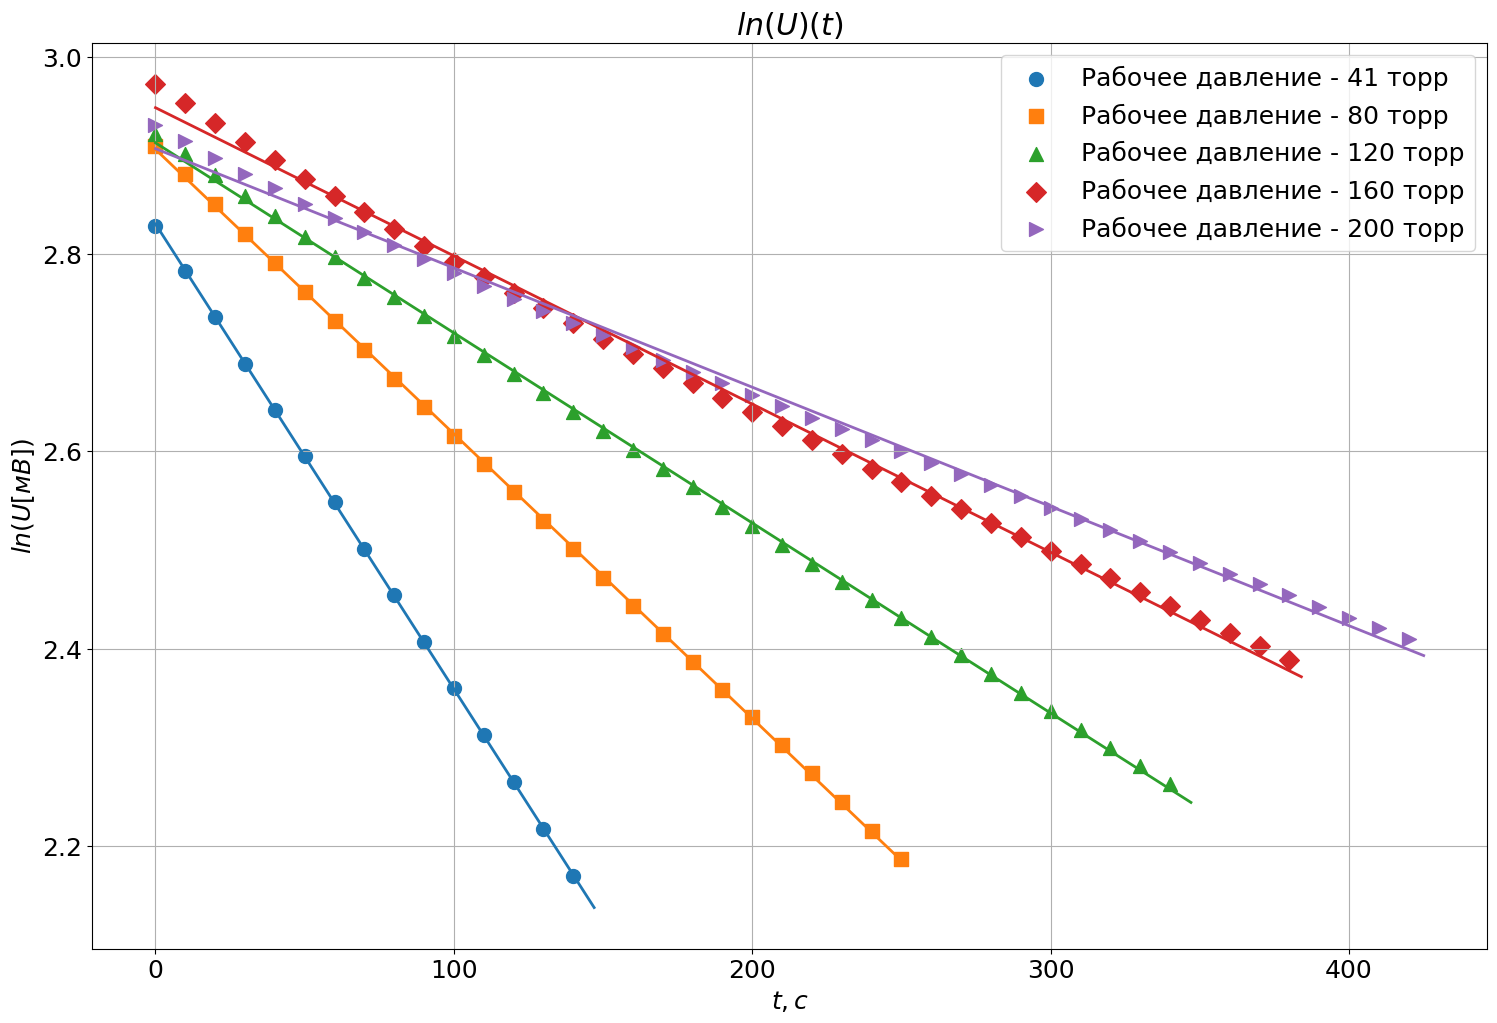

In [10]:
plt.figure(figsize=(18, 12), dpi=100)
plt.rcParams['font.size'] = 18
plt.grid(True)
plt.title("$ln(U)(t)$")
plt.xlabel(r"$t, с$")
plt.ylabel(r"$ln(U[мВ])$")

t_list = []
dt_list = []

for i, el in enumerate(data):
    X, Y = df_to_xy(el)
    a, b, da, db = mnk(X,Y)
    x_min = np.min(X)
    x_max = np.max(X)
    x_mm = np.array([x_min, x_max])
    
    plt.plot(x_mm, a*x_mm + b, color=colors[i], linewidth=2)
    plt.scatter(*df_to_xy_sparse(el), marker=markers[i], color=colors[i],
                label=f"Рабочее давление - {pressures[i]} торр", linewidth=1, s=100)
    
    t = -1 / a
    dt = da / a / a
    
    t_list.append(t)
    dt_list.append(dt)
    
    print(f'a: {a} \t da: {da} \nb: {t} \t db: {dt}\n--------------------------------')

lgnd = plt.legend()
for i in range(5):
    lgnd.legendHandles[i]._sizes = [100]
plt.savefig("../pictures/lnU(t)_mnk.png")

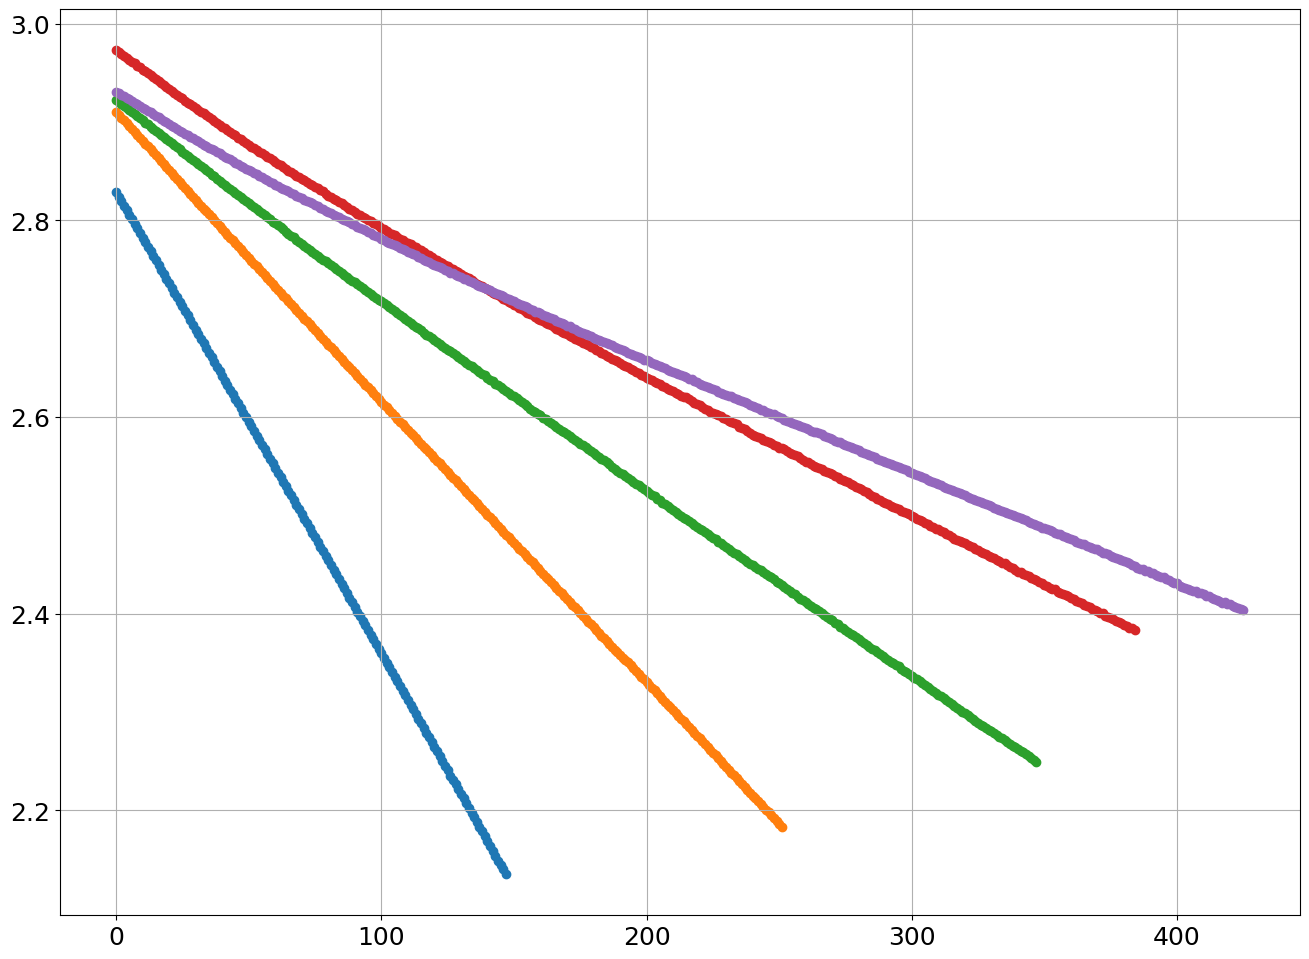

In [11]:
plt.figure(figsize=(16, 12), dpi=100)
plt.grid(True)

for i, el in enumerate(data):
    plot(*df_to_xy(el), do_mnk=False, marker='o', legend_text="as", linewidth=3, color=colors[i])

In [12]:
t_list = np.array(t_list)
dt_list = np.array(dt_list)
P = pressures
D = (A / t_list)
dD = D * np.sqrt((dA / A) ** 2 + (dt_list / t_list) ** 2)

D, dD

(array([9.66709779, 5.91504349, 3.95203444, 3.08114623, 2.47978624]),
 array([0.28302042, 0.17322816, 0.11588906, 0.0914178 , 0.07356505]))

a: 368.20486334257305 	 da: 39.635515128584615 
b: 0.8602524790891992 	 db: 0.5272092510498883
--------------------------------------------------


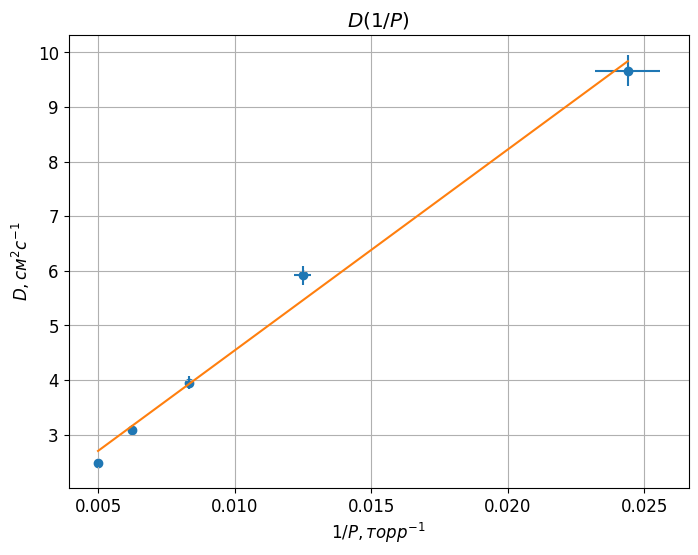

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
plt.rcParams['font.size'] = 12
plt.grid(True)
plt.title("$D(1/P)$")
plt.xlabel(r"$1/P, торр^{-1}$")
plt.ylabel(r"$D, см^2с^{-1}$")

plt.scatter(1/P, D)
plt.errorbar(1/P, D, xerr=2/P/P, yerr=dD, linestyle='')
a,b,da,db = mnk(1/P, D)
print(f'a: {a} \t da: {da} \nb: {b} \t db: {db}')
print('-'*50)

x_mm = np.array([np.min(1/P), np.max(1/P)])

plt.plot(x_mm, a*x_mm + b)

plt.savefig('../pictures/D.png')